In [8]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
"""import gp
importlib.reload(gp)
from gp import *"""
import pandas as pd

import gp_fijando_operaciones
importlib.reload(gp_fijando_operaciones)
from gp_fijando_operaciones import *

In [9]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [10]:
funcdict = {
	'add' : 7,
	'sub' : 2,
	'mul' : 3,
	'div' : 2,
	'inv' : 5,
	'log' : 5,
	'sqrt' : 3,
	'exp' : 3,
	'max' : 4,
	'min' : 0,
	'floor' : 4
}

#gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
#res = gp.execute(x,y, generations=100)
#res

gp_fijando_operaciones = GP(M=500, max_depth=15, prob_node_symb=0.5, func_list=list(funcdict.keys()), prob_func=list(funcdict.values()), elitism=0.05, depth_penalty=0.005)
res = gp_fijando_operaciones.execute(x,y, generations=100)
res


c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
Progress:  18%|█▊        | 18/100 [00:24<02:35,  1.90s/it]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: invalid value encountered in add
  return self.operator(*args)
Progress:  64%|██████▍   | 64/100 [03:19<03:07,  5.21s/it]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: invalid value encountered in multiply
  return self.operator(*args)
Progress:  92%|█████████▏| 92/100 [05:47<00:39,  4.89s/it]

**Mejor fitness con y sin penalización**

In [ ]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	2.2945397113773383
best fitness penalizado:	2.3977939983893184


**Gráfica árbol**

In [ ]:
(res["best_trees"][-1]).pprint()


  div__________________________________________________________________________________________________________________________________________________________________
 /                                                                                                                                                                     \
x                                                                                                                                                               _______log
                                                                                                                                                               /
                                                                                                                                 ____________________________add___
                                                                                                                                /                                  \
 

**Ecuación**

In [ ]:
print(res['best_trees'][-1])

div(x,log(add(add(add(add(add(div(div(x,1.6785153517235005),1.7569736811626848),exp(exp(0.8392823885626188))),log(x)),exp(exp(0.8392823885626188))),exp(exp(1.0424091478294988))),log(x))))


**Gráficos**

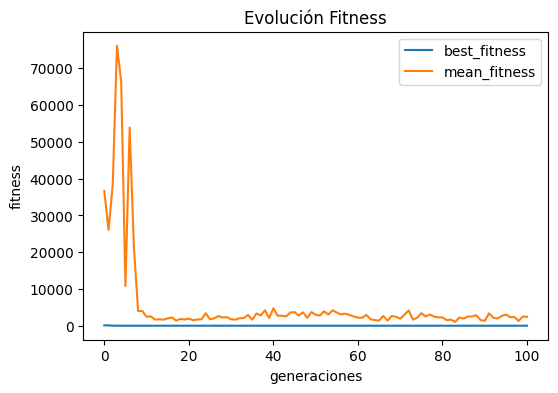

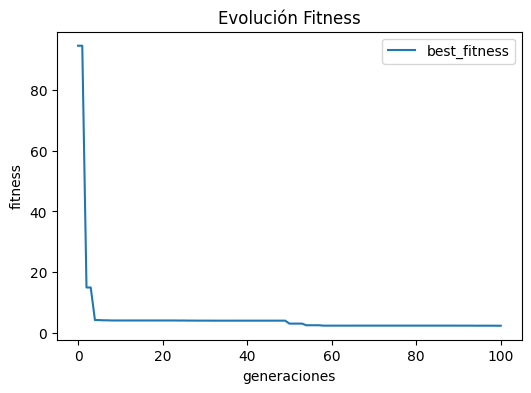

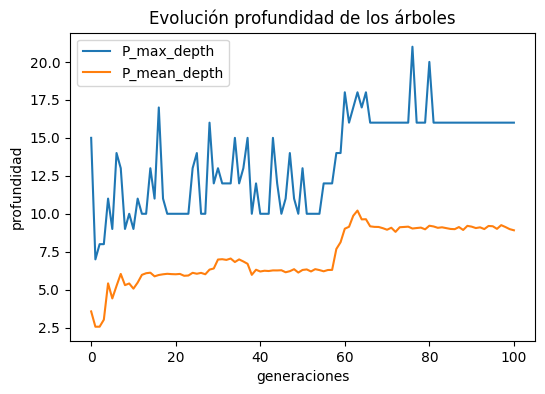

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()